Practice Project -
Salary Project
Problem Statement:
Problem Statement
Predict the salary if the employee using the features provided in the data. 

Downlaod Files:
https://github.com/dsrscientist/dataset3/blob/main/Salaries.csv

In [185]:
#STEP1: Importing all imports, reading data
from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
df=pd.read_csv("Salaries.csv")

In [188]:
type(df)

pandas.core.frame.DataFrame

In [189]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [190]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [191]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [192]:
df.shape

(397, 6)

In [193]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Scatterplot:

<AxesSubplot:xlabel='rank', ylabel='salary'>

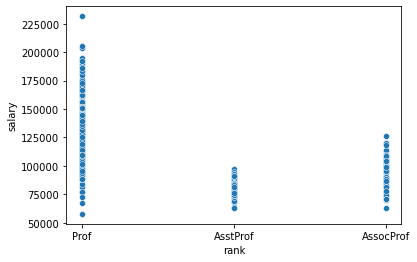

In [194]:
import seaborn as sns
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

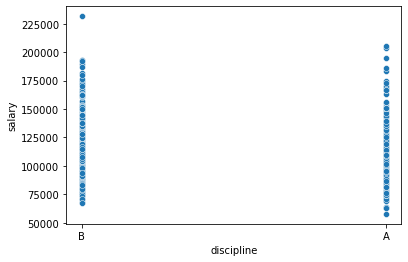

In [195]:
import seaborn as sns
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

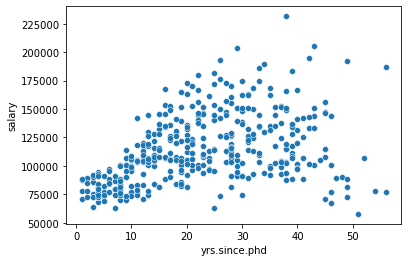

In [196]:
import seaborn as sns
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

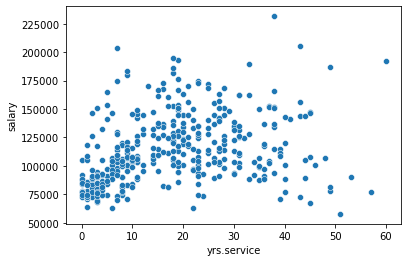

In [197]:
import seaborn as sns
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

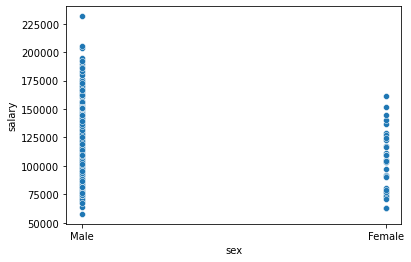

In [198]:
import seaborn as sns
sns.scatterplot(x="sex",y="salary",data=df)

Describing Datasets:

In [200]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


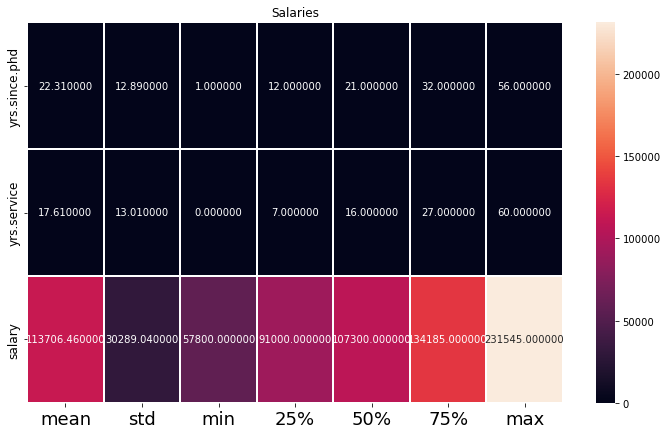

In [201]:
plt.figure(figsize=(12,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Salaries")
plt.show()

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Exploratory Data Analysis(EDA)

<AxesSubplot:>

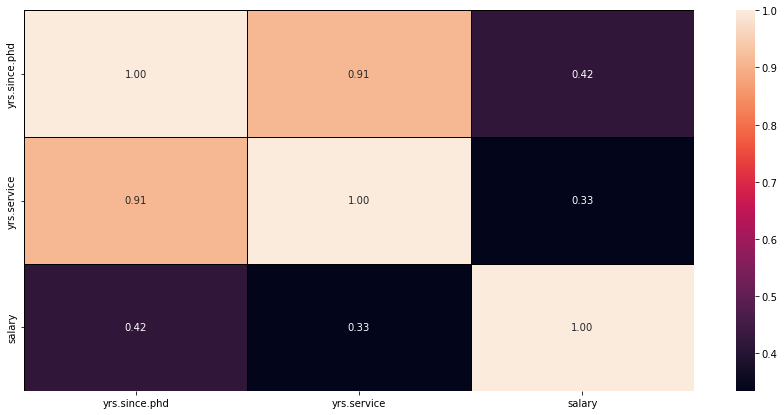

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [204]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
labelEncoder=LabelEncoder()
df['rank'] = labelEncoder.fit_transform(df['rank'])
df['discipline'] = labelEncoder.fit_transform(df['discipline'])
df['sex'] = labelEncoder.fit_transform(df['sex'])

<Figure size 432x288 with 0 Axes>

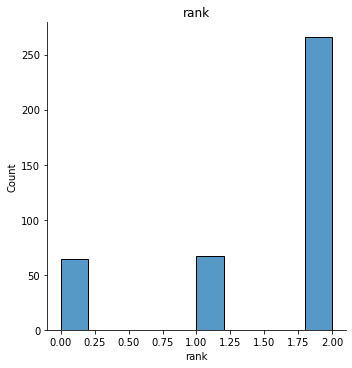

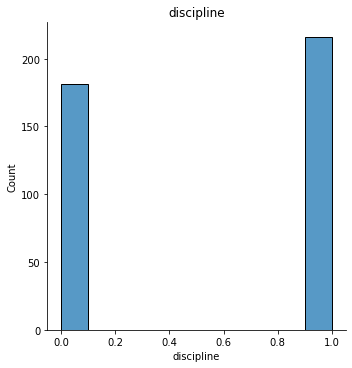

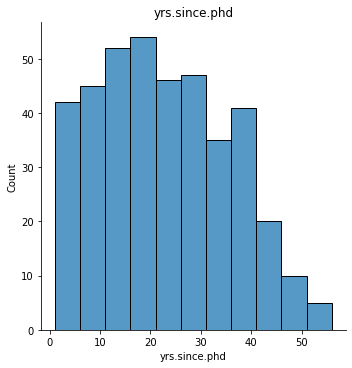

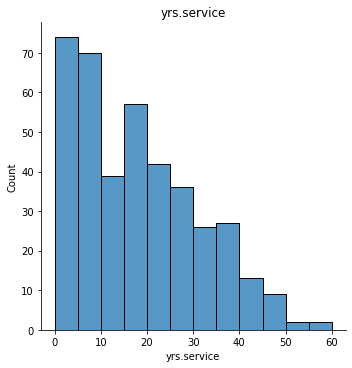

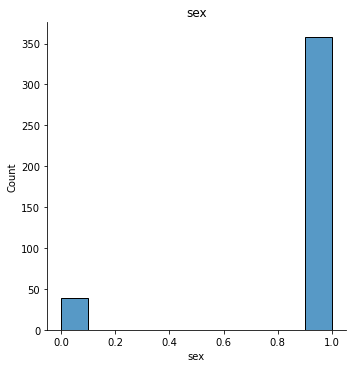

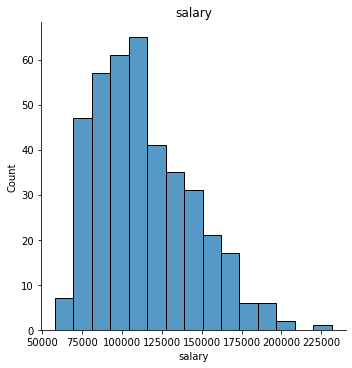

In [205]:
plt.figure()
for col in df.columns:
    sns.displot(df[col])
    plt.title(col)

# Skewness:

In [207]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Outliers Checking:

In [208]:
col=df.columns

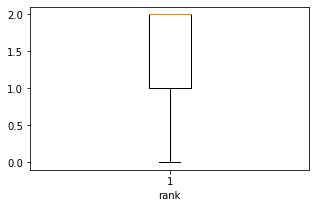

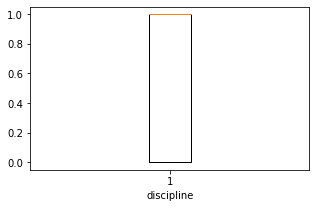

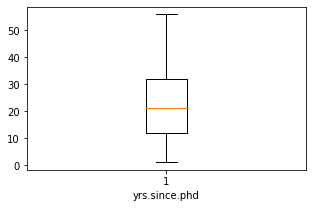

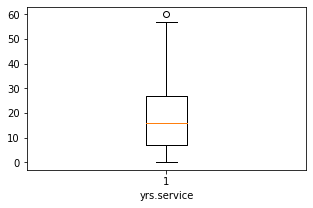

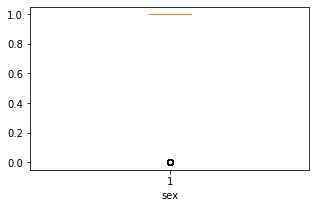

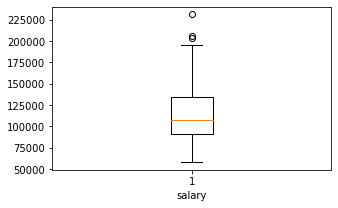

In [209]:
for i in df.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[i])
    plt.xlabel(i)

Correlation:

In [210]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [211]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

# Bivariante Analysis

In [213]:
cor_table = pd.DataFrame(df.corr(),columns=df.columns)
cor_table

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


# Correlation Using Heatmap

<AxesSubplot:>

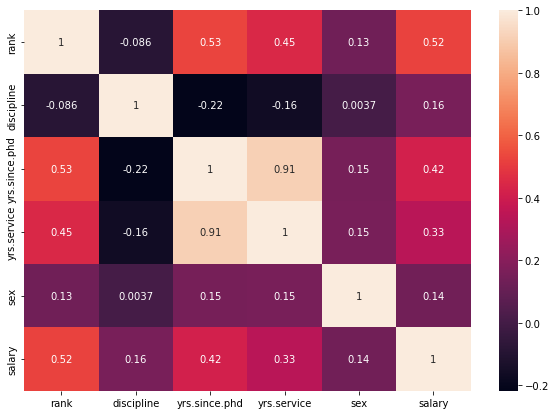

In [214]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'yrs.service vs Salary')

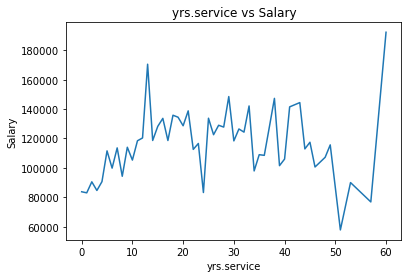

In [215]:
x = np.sort(df['yrs.service'].unique());
y = df.groupby(['yrs.service'])['salary'].mean();
plt.plot(x,y);
plt.xlabel("yrs.service");
plt.ylabel('Salary')
plt.title("yrs.service vs Salary")

Text(0.5, 1.0, 'yrs.since.phd vs Salary')

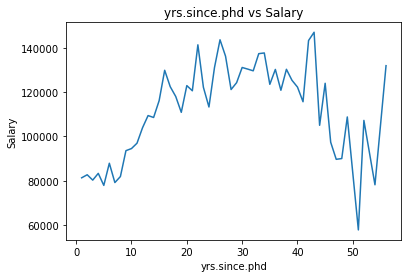

In [216]:
x = np.sort(df['yrs.since.phd'].unique());
y = df.groupby(['yrs.since.phd'])['salary'].mean();
plt.plot(x,y);
plt.xlabel("yrs.since.phd");
plt.ylabel('Salary')
plt.title("yrs.since.phd vs Salary")

# Normal Distribution Curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

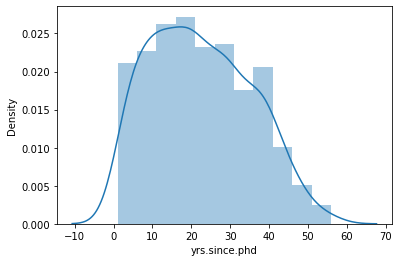

In [217]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

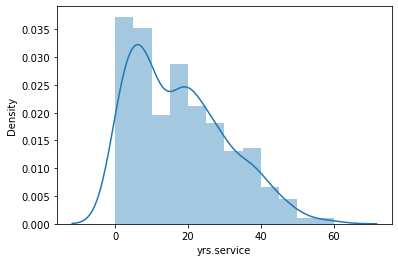

In [218]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

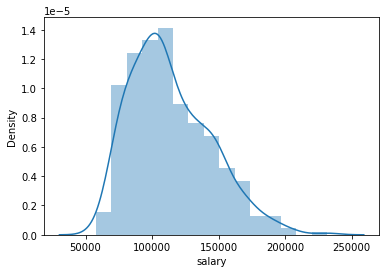

In [219]:
sns.distplot(df["salary"])

In [226]:
columns = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

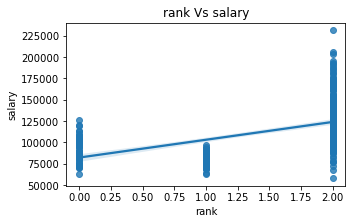

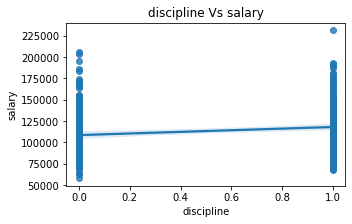

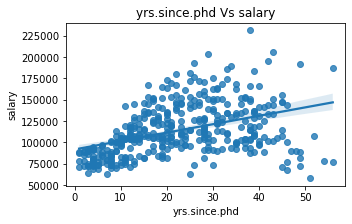

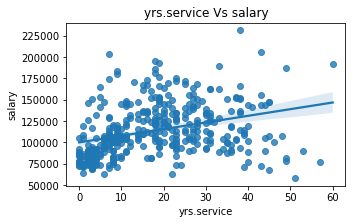

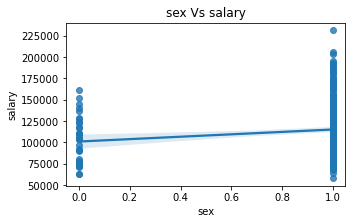

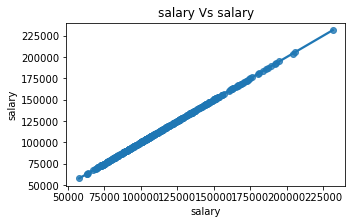

In [227]:
i = int(123)
for c in columns:
    plt.figure(figsize=(5,3))
    sns.regplot(df[c],df['salary'])
    plt.title(c+ ' Vs salary')
    plt.show()

# DATA CLEANING

In [228]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 6)

In [229]:
threshold=3 #thumb Rule
#index number
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [230]:
len(np.where(z>3)[0])

43

In [231]:
z.iloc[4]

rank             0.649257
discipline       0.915403
yrs.since.phd    1.374055
yrs.service      1.800312
sex              0.330058
salary           0.918768
Name: 4, dtype: float64

In [232]:
df_new=df[(z<3).all(axis=1)]

In [233]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           354 non-null    int32
 1   discipline     354 non-null    int32
 2   yrs.since.phd  354 non-null    int64
 3   yrs.service    354 non-null    int64
 4   sex            354 non-null    int32
 5   salary         354 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 15.2 KB


In [234]:
df_new.reset_index()

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,2,1,19,18,1,139750
1,1,2,1,20,16,1,173200
2,2,1,1,4,3,1,79750
3,3,2,1,45,39,1,115000
4,4,2,1,40,41,1,141500
...,...,...,...,...,...,...,...
349,392,2,0,33,30,1,103106
350,393,2,0,31,19,1,150564
351,394,2,0,42,25,1,101738
352,395,2,0,25,15,1,95329


In [236]:
power = PowerTransformer()
for i in df_new.columns:
    if np.abs(df_new[i].skew()) > 0.5:
        df_new[[i]] = power.fit_transform(df_new[[i]])

In [237]:
df.skew(), df_new.skew()

(rank            -1.151164
 discipline      -0.177684
 yrs.since.phd    0.300880
 yrs.service      0.650569
 sex             -2.709958
 salary           0.714568
 dtype: float64,
 rank            -0.905242
 discipline      -0.182308
 yrs.since.phd    0.234156
 yrs.service     -0.138197
 sex              0.000000
 salary           0.000000
 dtype: float64)

In [239]:
y = df_new['salary'].values
y = y.reshape(-1,1)

# Preprocessing Data / Feature Engineering

In [240]:
scale = StandardScaler()

In [241]:
df_new.drop('salary',inplace=True,axis=1)

In [242]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.662619,1,19,0.213911,1
1,0.662619,1,20,0.065673,1
2,-1.185337,1,4,-1.324854,1
3,0.662619,1,45,1.417554,1
4,0.662619,1,40,1.511111,1
...,...,...,...,...,...
392,0.662619,0,33,0.960235,1
393,0.662619,0,31,0.284763,1
394,0.662619,0,42,0.673355,1
395,0.662619,0,25,-0.012113,1


In [243]:
features = scale.fit_transform(df_new)

In [244]:
scaled_data = pd.DataFrame(features,columns=df_new.columns)
scaled_data

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.662619,0.913344,-0.286950,0.213911,0.0
1,0.662619,0.913344,-0.208991,0.065673,0.0
2,-1.185337,0.913344,-1.456332,-1.324854,0.0
3,0.662619,0.913344,1.739979,1.417554,0.0
4,0.662619,0.913344,1.350185,1.511111,0.0
...,...,...,...,...,...
349,0.662619,-1.094878,0.804473,0.960235,0.0
350,0.662619,-1.094878,0.648556,0.284763,0.0
351,0.662619,-1.094878,1.506102,0.673355,0.0
352,0.662619,-1.094878,0.180803,-0.012113,0.0


In [247]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
df_pca = pca.fit_transform(scaled_data)
pca_scaled = pd.DataFrame(df_pca,columns=['Feature1','Feature2','Feature3','Feature4','Feature5'])

<AxesSubplot:>

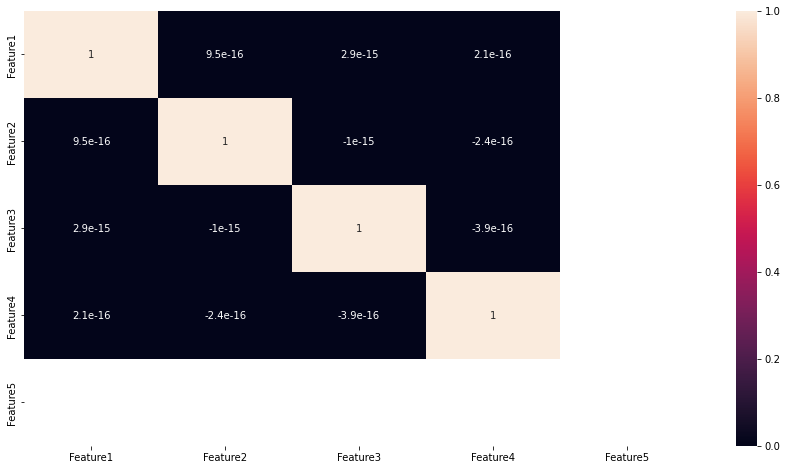

In [248]:
plt.figure(figsize=(15,8))
sns.heatmap(pca_scaled.corr(),annot=True)

# Modeling Data

In [249]:
pca_scaled

,Feature1,Feature2,Feature3,Feature4,Feature5
0,0.096829,-1.029266,-0.466234,-0.339440,-0.0
1,0.056155,-1.017170,-0.500659,-0.181117,-0.0
2,-2.435452,-0.419777,0.068185,-0.055434,0.0
3,2.024196,-1.274752,0.705467,0.300331,0.0
4,1.845365,-1.263529,0.612952,-0.046118,0.0
...,...,...,...,...,...
349,1.605377,0.778479,-0.015791,-0.153417,-0.0
350,1.113126,0.861897,-0.344100,0.198031,0.0
351,1.857353,0.771394,0.102323,0.551630,-0.0
352,0.657069,0.920663,-0.622303,0.063529,0.0


In [253]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import joblib 

In [254]:
randomstate = 0
max_score = 0
lr = LinearRegression()
for i in range(400):
    x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Best Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Best Random State= 0  and R2 Score of LR MODEL :  100.0


In [257]:
x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = 37)

In [258]:
models = [LinearRegression(),Lasso(),Ridge(alpha=.1),ElasticNet(),RandomForestRegressor(n_estimators=100),AdaBoostRegressor(n_estimators=100),
                      SVR(kernel= 'linear', gamma= .001, C= 1),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=11)]

In [259]:
r2_scores = []
cv_scores = []
for model in models:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    score = r2_score(y_test,pred_model)
    print('r2 Score of Model ',model, 'is : ',score*100)
    r2_scores.append(score)
    print('MEAN SQUARED ERROR OF ',model ,' is : ',mean_squared_error(y_test,pred_model))
    cv_scores.append(np.mean(cross_val_score(model,scaled_data,y,cv=5,scoring='r2')))

r2 Score of Model  LinearRegression() is :  100.0
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0
r2 Score of Model  Lasso() is :  100.0
MEAN SQUARED ERROR OF  Lasso()  is :  0.0
r2 Score of Model  Ridge(alpha=0.1) is :  100.0
MEAN SQUARED ERROR OF  Ridge(alpha=0.1)  is :  0.0
r2 Score of Model  ElasticNet() is :  100.0
MEAN SQUARED ERROR OF  ElasticNet()  is :  0.0
r2 Score of Model  RandomForestRegressor() is :  100.0
MEAN SQUARED ERROR OF  RandomForestRegressor()  is :  0.0
r2 Score of Model  AdaBoostRegressor(n_estimators=100) is :  100.0
MEAN SQUARED ERROR OF  AdaBoostRegressor(n_estimators=100)  is :  0.0
r2 Score of Model  SVR(C=1, gamma=0.001, kernel='linear') is :  100.0
MEAN SQUARED ERROR OF  SVR(C=1, gamma=0.001, kernel='linear')  is :  0.0
r2 Score of Model  DecisionTreeRegressor() is :  100.0
MEAN SQUARED ERROR OF  DecisionTreeRegressor()  is :  0.0
r2 Score of Model  KNeighborsRegressor(n_neighbors=11) is :  100.0
MEAN SQUARED ERROR OF  KNeighborsRegressor(n_neighbor

In [260]:
cv_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [261]:
dif = []
for i in range(0,9):
    diff = r2_scores[i] - cv_scores[i]
    dif.append(diff)
dic_ = {'r2_score': r2_scores,
         'cv_scores': cv_scores,
          'Diff in Scores': dif
       }

In [262]:
table = pd.DataFrame(dic_, index=['LR','LAS','Rid','EN','RF','ABR','SVR','DTR','KNR'])

In [263]:
table

,r2_score,cv_scores,Diff in Scores
LR,1.0,1.0,0.0
LAS,1.0,1.0,0.0
Rid,1.0,1.0,0.0
EN,1.0,1.0,0.0
RF,1.0,1.0,0.0
ABR,1.0,1.0,0.0
SVR,1.0,1.0,0.0
DTR,1.0,1.0,0.0
KNR,1.0,1.0,0.0


# Evaluation The Model

In [264]:
Linear_Model = LinearRegression()
Linear_Model.fit(x_train,y_train)
pred_model = Linear_Model.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2')))
print('Difference:' ,( score - np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2') )))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 1.0
Difference: 0.0
r2 Score of Model  LinearRegression() is :  1.0
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0
MEAN Absolute ERROR OF  LinearRegression()  is :  0.0


In [265]:
svr= SVR()
params = {'kernel': ['linear','rbf'],
           'C': [1,10,.1,.001,.01],
          'gamma':[1,10,.1,.001,.01]
         
         }
search = RandomizedSearchCV(svr,params,cv=5,scoring='r2',n_iter=40)

In [266]:
search.fit(pca_scaled,y)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=40,
                   param_distributions={'C': [1, 10, 0.1, 0.001, 0.01],
                                        'gamma': [1, 10, 0.1, 0.001, 0.01],
                                        'kernel': ['linear', 'rbf']},
                   scoring='r2')

In [267]:
search.best_params_

{'kernel': 'linear', 'gamma': 10, 'C': 0.001}

In [268]:
ridge= Ridge()
params = {'alpha': [1,.1,.001,10,.0001]         }
grid = GridSearchCV(ridge,params,cv=5,scoring='r2')

In [269]:
grid.fit(pca_scaled,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 10, 0.0001]}, scoring='r2')

In [270]:
grid.best_params_

{'alpha': 1}

In [271]:
ridge = Ridge(alpha = .0001)
ridge.fit(x_train,y_train)
pred_model = ridge.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2')))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('Difference:' ,( score - np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2') )))
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 1.0
r2 Score of Model  LinearRegression() is :  1.0
Difference: 0.0
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0
MEAN Absolute ERROR OF  LinearRegression()  is :  0.0


In [272]:
joblib.dump(ridge,'Salaries_Ridge.pk')

['Salaries_Ridge.pk']

In [273]:
lg = joblib.load('Salaries_Ridge.pk')